In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount("/content/drive")

!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

Mounted at /content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICeyklL46g42c+kOiDGQYpBIkUVa8Oott1qwDIqq8fti root@8ae8a1039f30

Please use SSH method to clone repo.


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 9.1 MB/s eta 0:00:00


In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/EECS_442_HOI

/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI


In [5]:
from vcoco.dataloader import get_train_val_test_loaders
from tqdm import tqdm
from matplotlib import pyplot as plt
import torch

added /content/drive/MyDrive/Colab Notebooks/EECS_442_HOI/vcoco/coco/PythonAPI to pythonpath


In [6]:
train_loader = get_train_val_test_loaders(5)

loading annotations into memory...
Done (t=2.70s)
creating index...
index created!
<class 'list'>
[183192, 183193, 183205, 183272, 183314, 183520, 183604, 183621, 183633, 183682, 183707, 183733, 183921, 184108, 184126, 184247, 184551, 184556, 184597, 184715, 184786, 184921, 184931, 184952, 185259, 185429, 185491, 185563, 185633, 185821, 185851, 185915, 185953, 186028, 186104, 186145, 186165, 186167, 186327, 186348, 186654, 186685, 186776, 186813, 186906, 187072, 187339, 187516, 187520, 187574, 187640, 187657, 187714, 187930, 187940, 187945, 188019, 188034, 188110, 188180, 188191, 188263, 188292, 188293, 188317, 188323, 188437, 188476, 188550, 188655, 188723, 188746, 188754, 188871, 188873, 188978, 189050, 189077, 189177, 189256, 189259, 189279, 189317, 189440, 189533, 189658, 189792, 189806, 189832, 189965, 190044, 190150, 190167, 190206, 190208, 190220, 190243, 190261, 190343, 190387, 190397, 190452, 190488, 190494, 190547, 190554, 190558, 190586, 190590, 190602, 190714, 190890, 19105

100%|██████████| 100/100 [00:24<00:00,  4.12it/s]


In [18]:
# visualize some data
# load ith batch to varialbe X and y
for i ,(X, y) in enumerate(train_loader):
  # print(X.shape)
  # print(y.shape)
  # plt.imshow(X)
  # print(X[0])
  if i < 10:
    plt.figure()
    plt.imshow(X[0].int())
    plt.plot(y[0][0], y[0][1], marker='.', markersize=20)


Output hidden; open in https://colab.research.google.com to view.

In [31]:
# Function to display a list of images
def display_images(image_list, title):
    if image_list:
        num_images = len(image_list)
        fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
        if num_images == 1:
            axes = [axes]  # Make it iterable
        for ax, img_tensor in zip(axes, image_list):
            np_image = img_tensor.permute(1, 2, 0).cpu().numpy()
            ax.imshow(np_image)
            ax.axis('off')
        plt.suptitle(title)
        plt.show()
    else:
        print(f"No {title.lower()} images to display.")


torch.Size([640, 640, 3])
torch.Size([3, 640, 640])
image_shape torch.Size([3, 640, 640])

0: 640x640 6 persons, 3 cars, 19 birds, 2 surfboards, 216.4ms
Speed: 0.0ms preprocess, 216.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


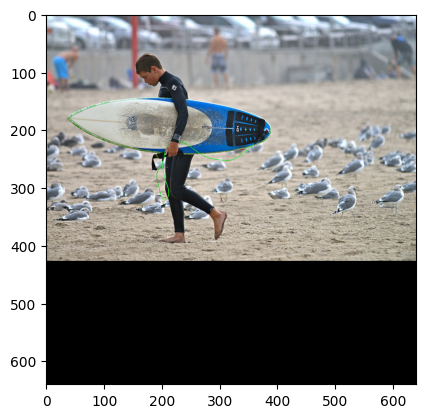

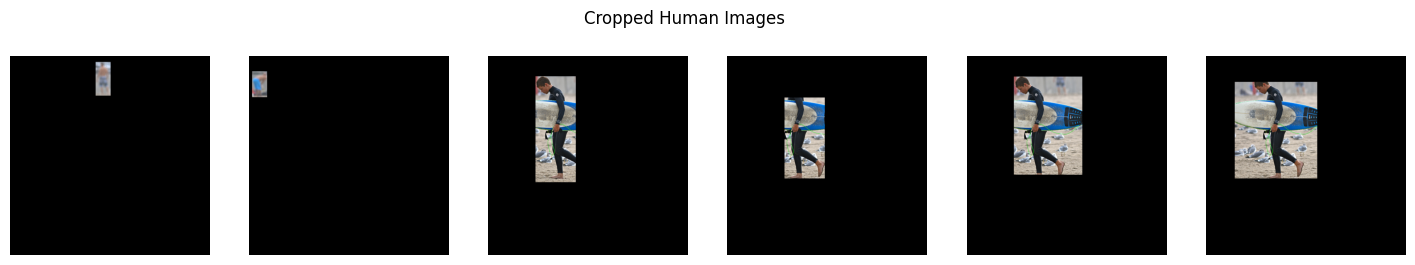

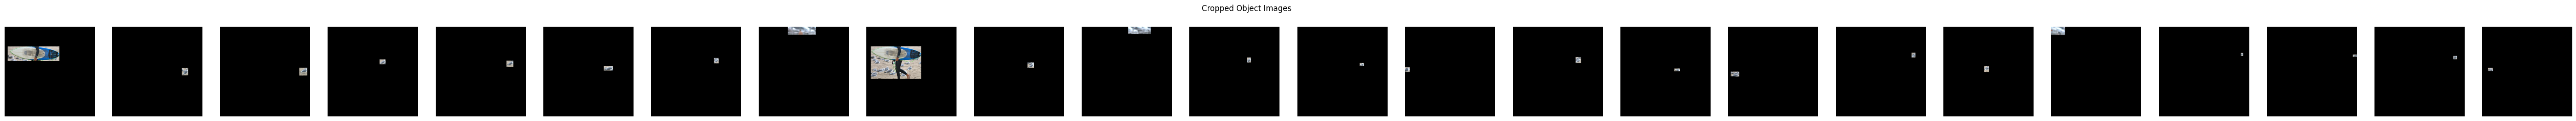

In [32]:
import pipeline
for i ,(X, y) in enumerate(train_loader):
  if i == 0:
    plt.imshow(X[0].int())
    print(X[0].shape)
    input = X[0].permute(2,0,1) # convert to 3x640x640
    # input = input.reshape(1, input.shape[0], input.shape[1], input.shape[2])
    print(input.shape)
    cropped_human, cropped_objects, id_objects = pipeline.extract_human_object(input / 255)

    # Display cropped human images
    display_images(cropped_human, "Cropped Human Images")

    # Display cropped object images
    display_images(cropped_objects, "Cropped Object Images")
    # plt.figure()
    # plt.imshow(X[0].int())
    # plt.plot(y[0][0], y[0][1], marker='.', markersize=20)

In [24]:
from torchvision.io import read_image
example = read_image('/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI/example_images/me.jpg')
print(example.shape)

ch, co, ido = pipeline.extract_human_object(example)

# original image
plt.imshow(example.permute(1,2,0))

# Display cropped human images
display_images(ch, "Cropped Human Images")

# Display cropped object images
display_images(co, "Cropped Object Images")


torch.Size([3, 1707, 1280])

WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 1707, 1280) is incompatible.


ValueError: ignored


WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 255.0. Dividing input by 255.
0: 640x640 2 persons, 200.5ms
Speed: 0.0ms preprocess, 200.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


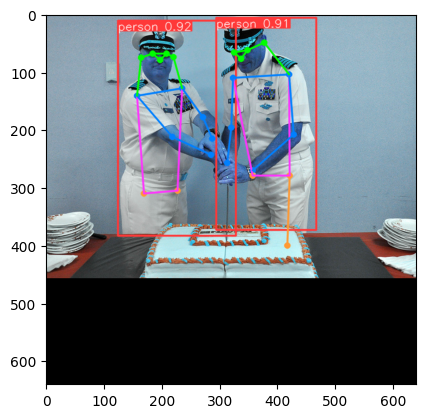

In [ ]:
from ultralytics import YOLO
from PIL import Image

model = YOLO('yolov8n-pose.pt')

for i ,(X, y) in enumerate(train_loader):
  if i == 1:
    input = X[4].permute(2,0,1)
    input = input.reshape(1, input.shape[0], input.shape[1], input.shape[2])
    results = model(input)

    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        print(im_array.shape)
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.imshow(im)  # show image